### importing libraries

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [112]:
df = pd.read_csv("C:\\Users\HP\\OneDrive\\Desktop\\my-project\\data.csv")

In [114]:
df

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
...,...,...,...,...,...,...
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare


In [116]:
df.head(10)

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare
5,Chief Executive Officer (CEO),91%,153,1135,0.134802,Supply Chain & Logistics
6,Therapist,90%,114,983,0.115972,Law Enforcement
7,Chief Strategy Officer,90%,184,1284,0.143302,Construction
8,Admin,90%,253,2014,0.125621,Sales & Marketing
9,General Clerk,90%,242,1903,0.127168,Hospitality


In [118]:
df.tail(10)

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
4696,Investor,5%,995,3428,0.290257,Law Enforcement
4697,Revenue Officer,5%,837,3156,0.265209,Construction
4698,Musician,5%,654,2764,0.236614,Sales & Marketing
4699,Organist,5%,586,2397,0.244472,Hospitality
4700,Pianist,5%,586,2410,0.243154,Communication & PR
4701,Singer,5%,686,2798,0.245175,Data & IT
4702,Airport,5%,556,2206,0.252040,Administrative & Clerical
4703,Director,5%,1316,4695,0.280298,Leadership & Strategy
4704,Nurse,5%,710,2594,0.273709,Medical & Healthcare
4705,Technician,5%,825,3256,0.253378,Supply Chain & Logistics


In [120]:
domain_count = df['Domain'].nunique()
domain_count

10

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job titiles        4706 non-null   object 
 1   AI Impact          4706 non-null   float64
 2   Tasks              4706 non-null   int64  
 3   AI models          4706 non-null   int64  
 4   AI_Workload_Ratio  4706 non-null   float64
 5   Domain             4706 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 220.7+ KB


In [143]:
df.describe()

,AI Impact,Tasks,AI models,AI_Workload_Ratio
count,4706.000000,4706.000000,4706.000000,4706.000000
mean,0.303126,400.708032,1817.678071,0.204611
std,0.182038,311.564781,1086.853037,0.076490
min,0.050000,1.000000,0.000000,0.036585
25%,0.150000,161.000000,1085.250000,0.137271
50%,0.250000,270.000000,1577.500000,0.198885
75%,0.400000,608.750000,2273.000000,0.260418
max,0.980000,1387.000000,5666.000000,1.000000


In [126]:
df.columns

Index(['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')

### Data Cleaning

In [129]:
inf_values = (df['AI_Workload_Ratio'] == float('inf')).sum()
inf_values

7

In [131]:
##infinite_values = pd.isinf(df['AI_Workload_Ratio'])

In [133]:
##dealing with infinte values
df['AI_Workload_Ratio'].replace(float('inf'), np.nan, inplace=True)
median = df['AI_Workload_Ratio'].median()
df['AI_Workload_Ratio'].fillna(median, inplace=True)
##checking infinite values after cleaning
inf_values1 = (df['AI_Workload_Ratio'] == float('inf')).sum()
inf_values1

0

In [135]:
##converting AI Impact column from string to decimal number
df['AI Impact'] = df['AI Impact'].str.replace('%', '').astype(float) / 100

In [137]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4701    False
4702    False
4703    False
4704    False
4705    False
Length: 4706, dtype: bool


In [139]:
df.drop_duplicates(inplace = True)

### Explorating The Data

### Correlation

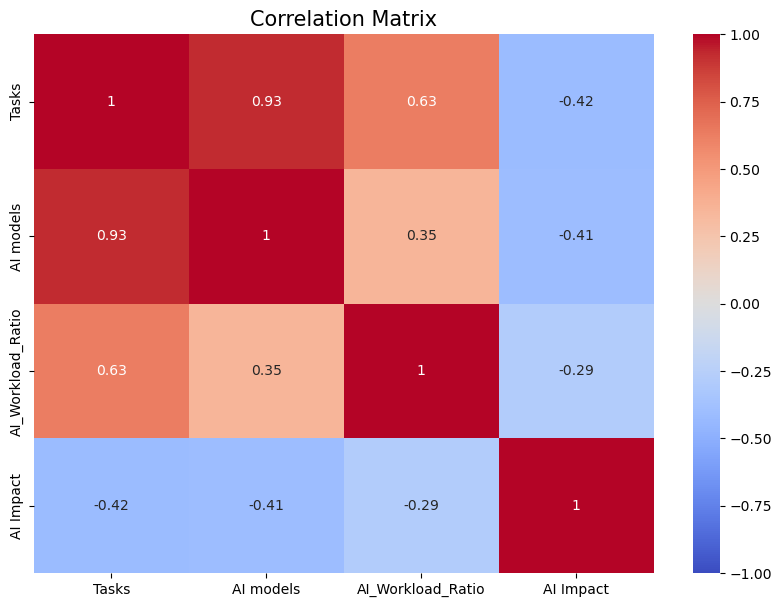

In [35]:
##correlation 
correlation_matrix = df[['Tasks', 'AI models', 'AI_Workload_Ratio','AI Impact']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=15)
plt.show() 



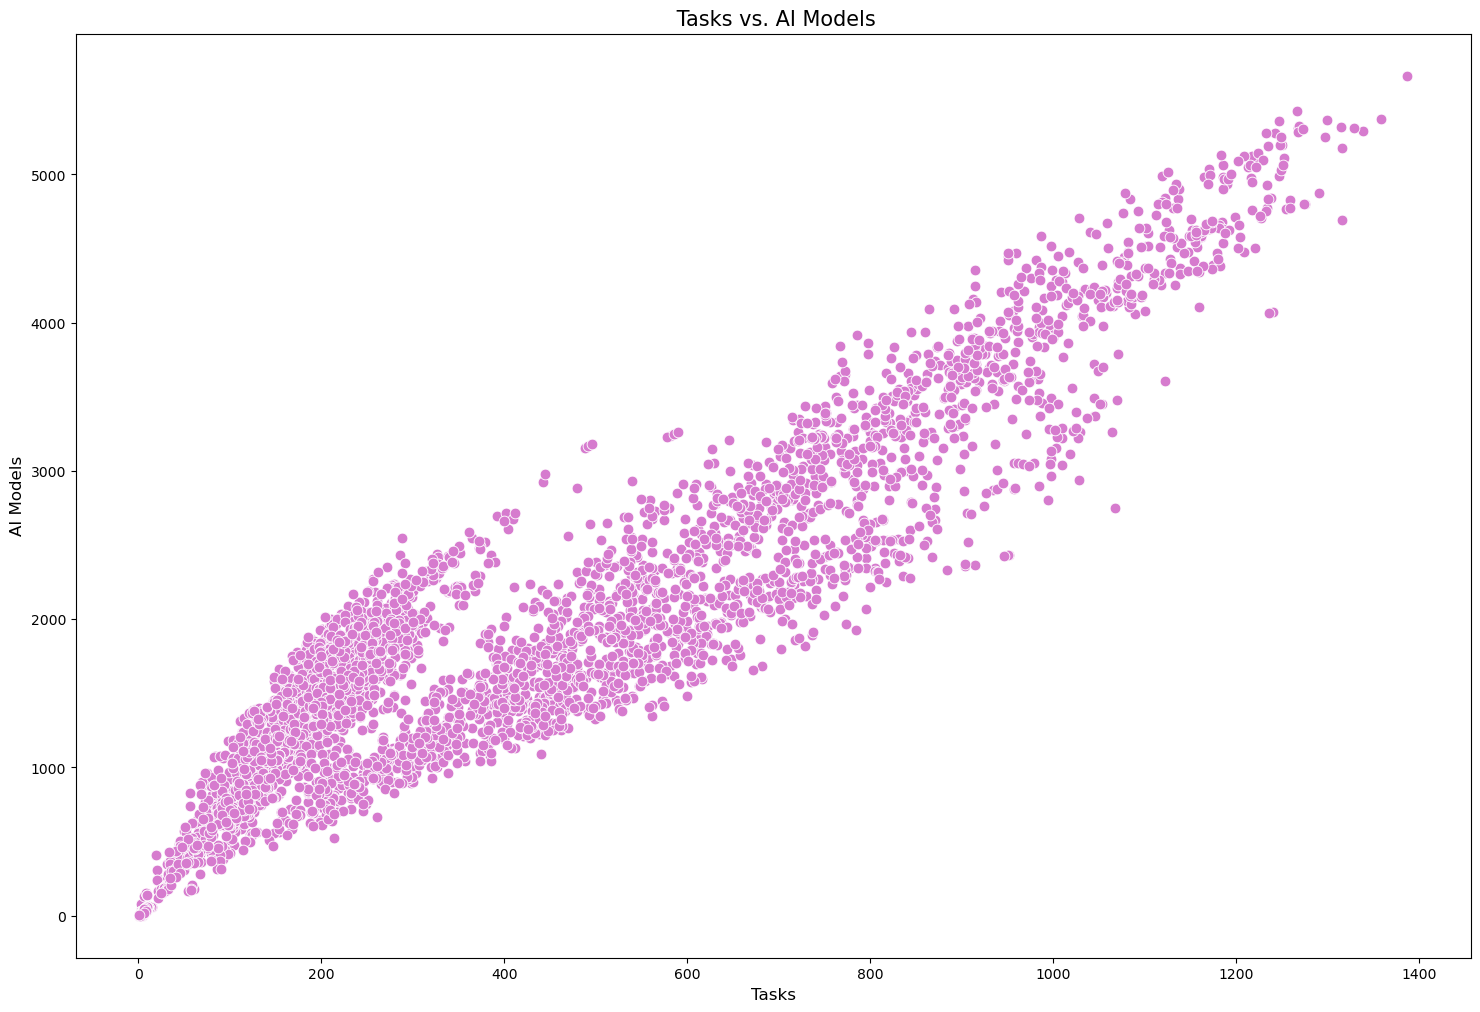

In [36]:
plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x='Tasks', y='AI models',   s=60,  marker="o", color="#D67BCE")
plt.title(' Tasks vs. AI Models', fontsize=15)
plt.xlabel('Tasks', fontsize=12)
plt.ylabel('AI Models', fontsize=12)
plt.show()

##### A strong positive correlation can be seen between Tasks performed by humans and implementation of AI models. As the tasks increase the AI Models also increase.

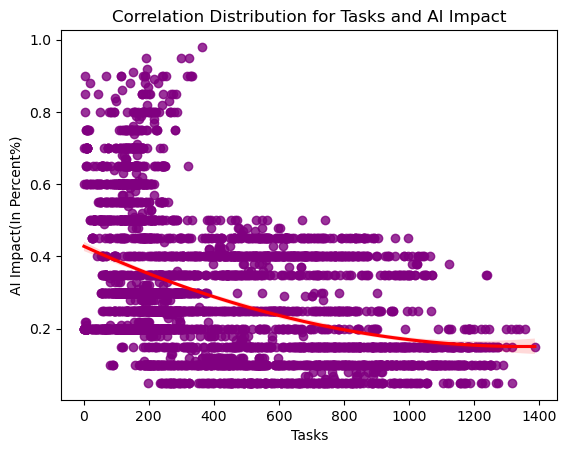

In [40]:
sns.regplot(data=df, x='Tasks', y='AI Impact',color='purple', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for Tasks and AI Impact')
plt.xlabel('Tasks')
plt.ylabel('AI Impact(In Percent%)')
plt.show()

##### A moderate negative correlation which suggests that as the impact of AI on tasks increases the number of tasks tends decreases.

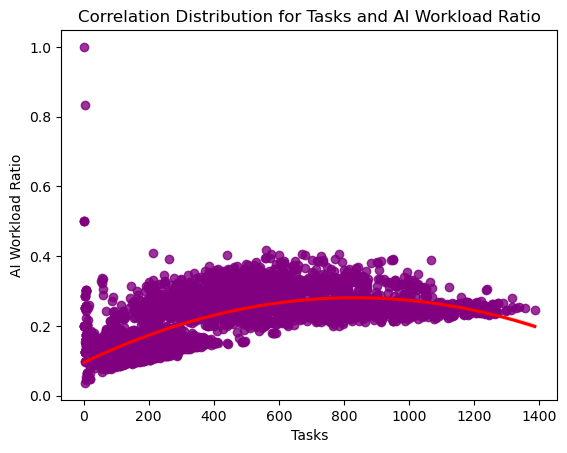

In [43]:
sns.regplot(data=df, x='Tasks', y='AI_Workload_Ratio',color='purple',order = 2,line_kws={"color": "red"})
plt.title('Correlation Distribution for Tasks and AI Workload Ratio')
plt.xlabel('Tasks')
plt.ylabel('AI Workload Ratio')
plt.show()

##### A moderate positive correlation is observed between tasks and AI worload ratio. As tasks increase the workload being handled by a human will also increase.

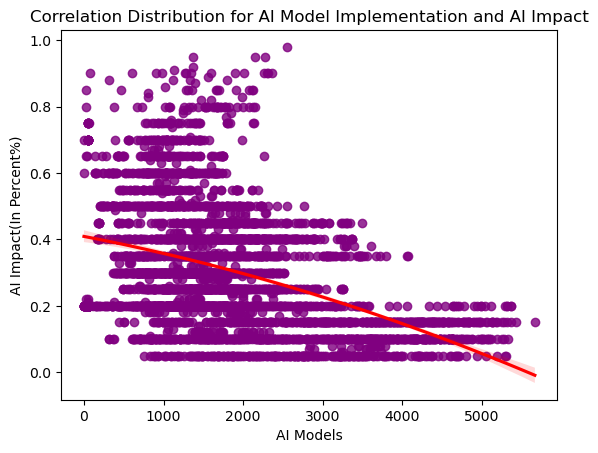

In [45]:
sns.regplot(data=df, x='AI models', y='AI Impact', color='purple',order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for AI Model Implementation and AI Impact')
plt.xlabel('AI Models')
plt.ylabel('AI Impact(In Percent%)')
plt.show()

##### As observed when the count of AI models implemented increases, the AI impact percentage on job titles tends to decrease moderately

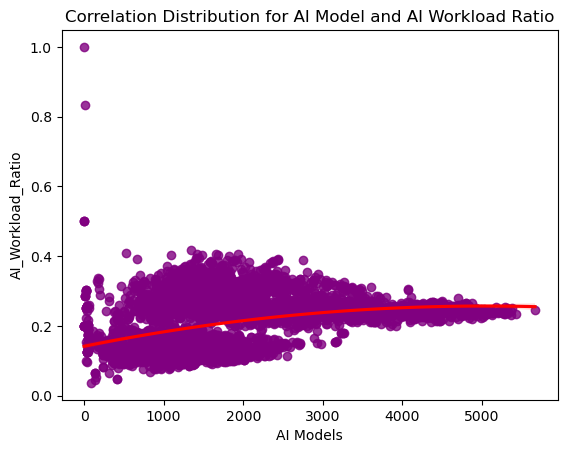

In [48]:
sns.regplot(data=df, x='AI models', y='AI_Workload_Ratio',color='purple', order=2,line_kws={"color": "red"})
plt.title('Correlation Distribution for AI Model and AI Workload Ratio')
plt.xlabel('AI Models')
plt.ylabel('AI_Workload_Ratio')
plt.show()

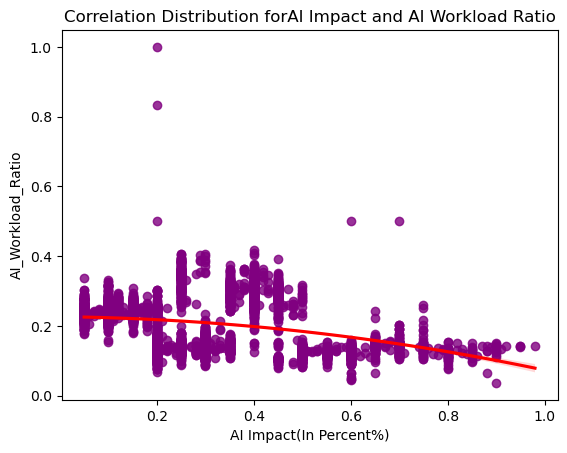

In [49]:
sns.regplot(data=df, x='AI Impact', y='AI_Workload_Ratio', order=2,color='purple',line_kws={"color": "red"})
plt.title('Correlation Distribution forAI Impact and AI Workload Ratio')
plt.xlabel('AI Impact(In Percent%)')
plt.ylabel('AI_Workload_Ratio')
plt.show()

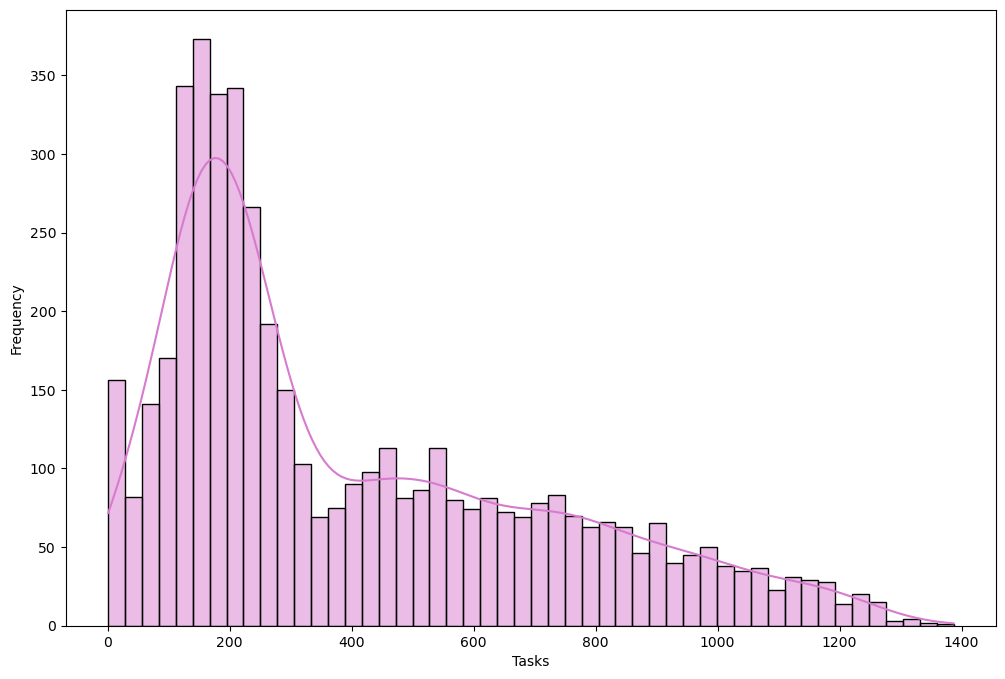

In [50]:
##histogram plot for the distribution of the tasks performed by human among the job titles
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Tasks', bins=50, color= "#D67BCE", kde=True)
plt.xlabel('Tasks')
plt.ylabel('Frequency')
plt.show()

##### most of the employees do tasks between 100-300  which  suggests an optimal number of tasks that can handled by a human.A sharp decline in task distribution suggests that it's not practical for a human to handle tasks over 300.

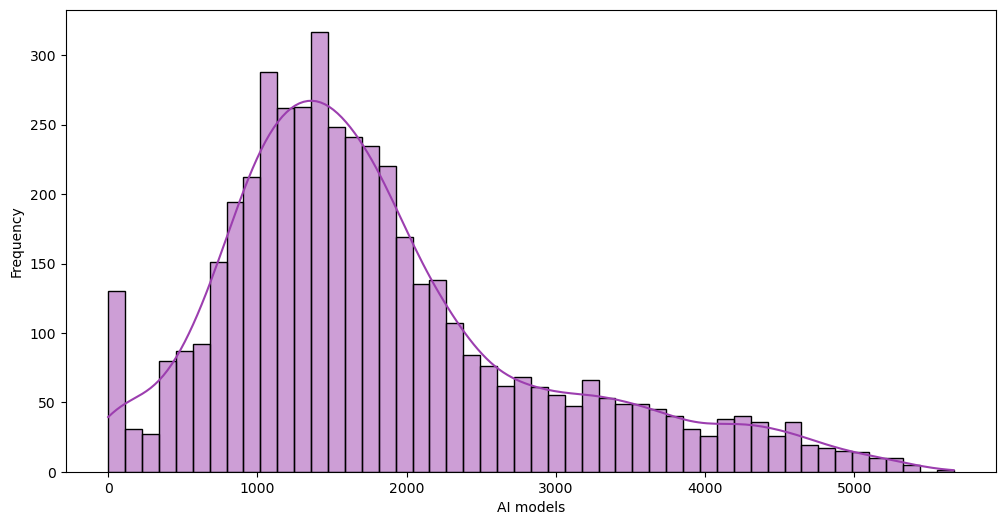

In [53]:
##histogram plot for the distribution of the 'AI models' performed by human among the job titles
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='AI models', bins=50, color="#9C3EAF", kde=True)
plt.xlabel('AI models')
plt.ylabel('Frequency')
plt.show()

##### The majority of the AI model implementation within the range of 1000-2000

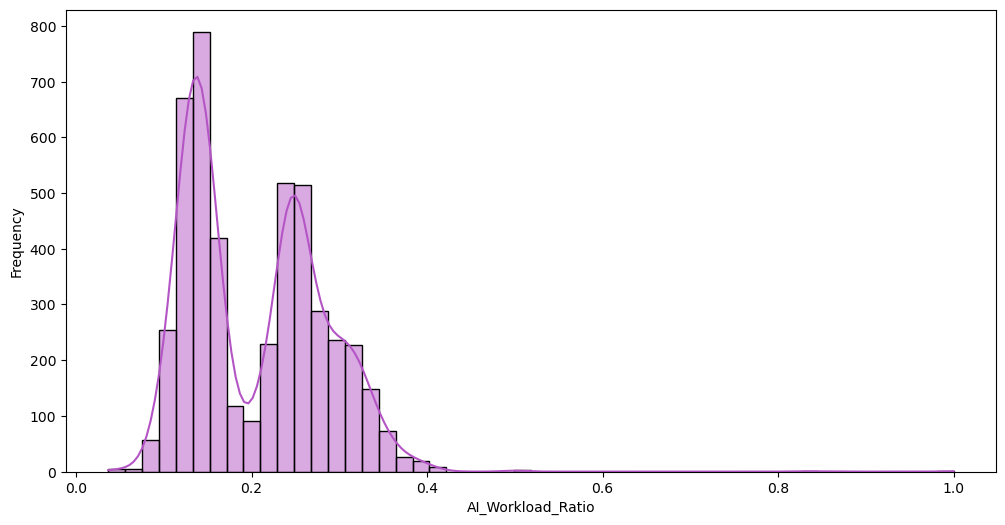

In [55]:
##histogram plot for the distribution of the 'AI_Workload_Ratio' performed by human among the job titles
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='AI_Workload_Ratio', bins=50, color="#B455C5", kde=True)
plt.xlabel('AI_Workload_Ratio')
plt.ylabel('Frequency')
plt.show()

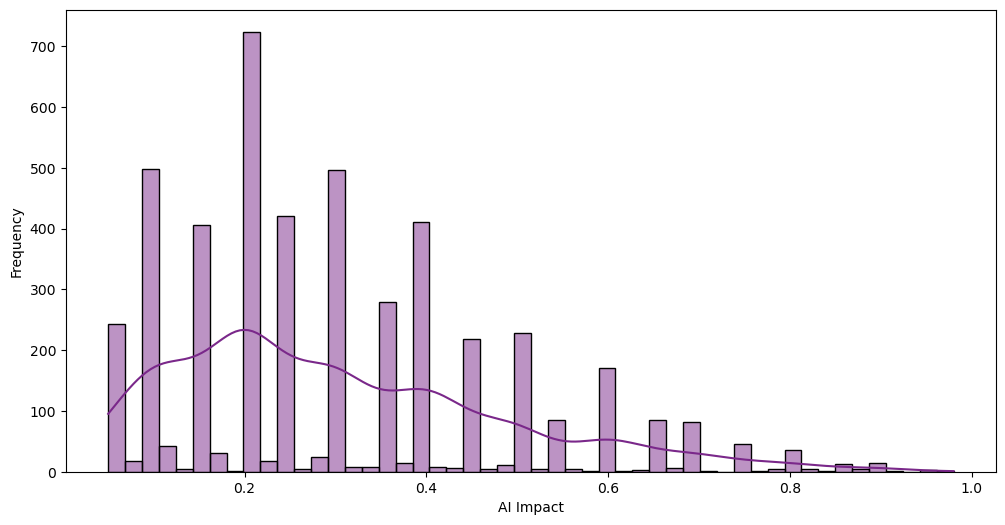

In [57]:
##histogram plot for the distribution of the ''AI Impact'' performed by human among the job titles
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='AI Impact', bins=50, color="#7A288A", kde=True)
plt.xlabel('AI Impact')
plt.ylabel('Frequency')
plt.show()

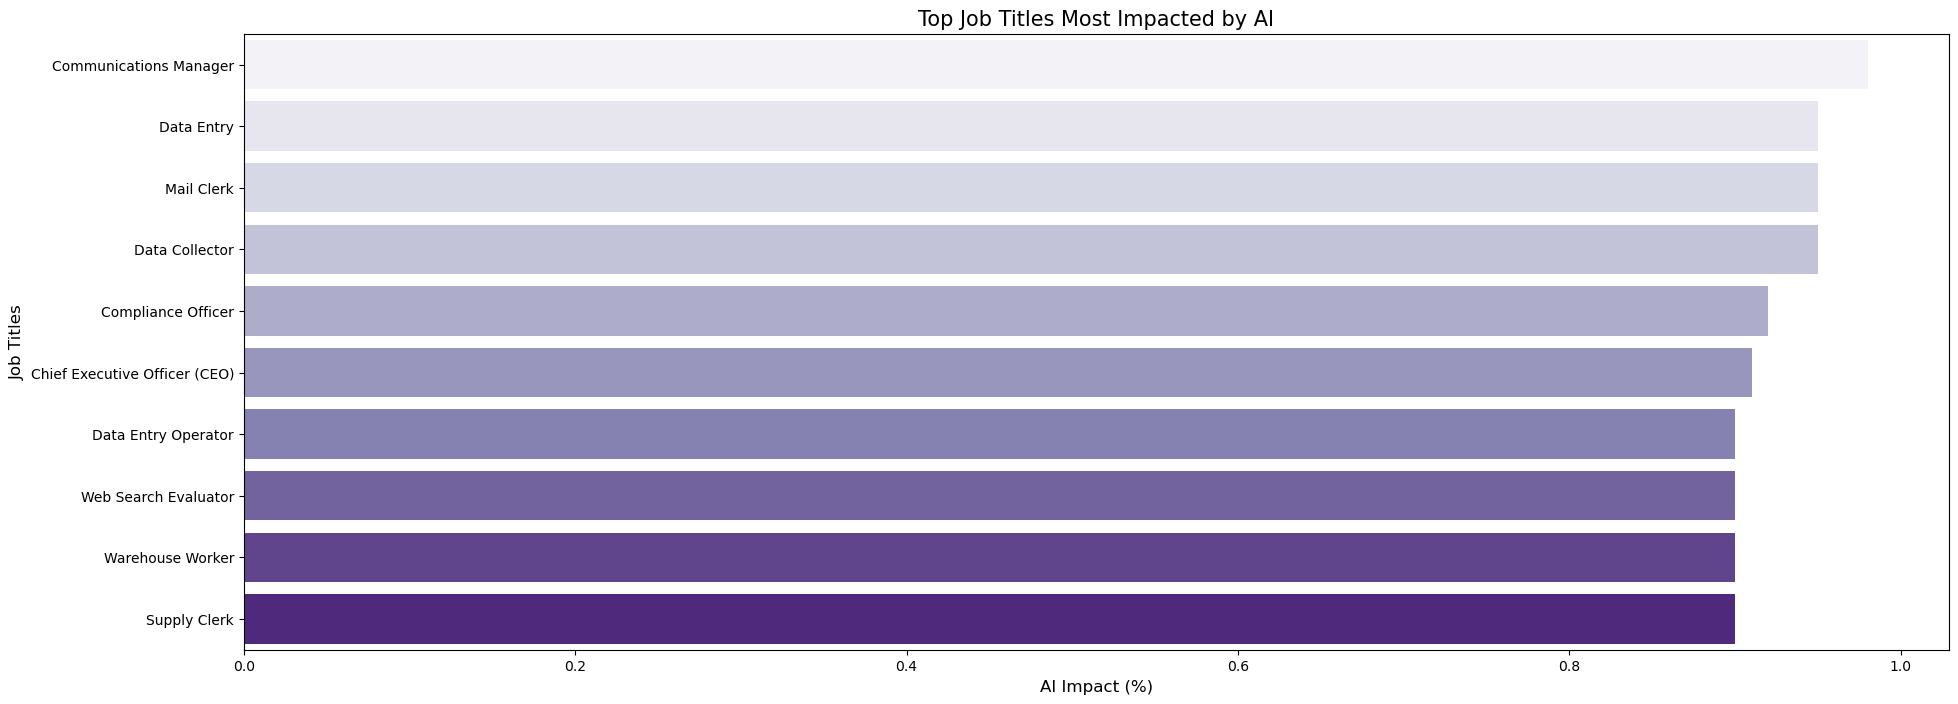

In [155]:
##top 10 most ai impacted jobs
top_10_impacted_jobs = df.sort_values(by='AI Impact', ascending=False).head(10)

plt.figure(figsize=(22, 8))
sns.barplot(x='AI Impact', y='Job titiles', data=top_10_impacted_jobs, palette="Purples")
plt.title('Top Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

In [59]:
max_impacted_jobs['Domain'].value_counts()

Series([], Name: count, dtype: int64)

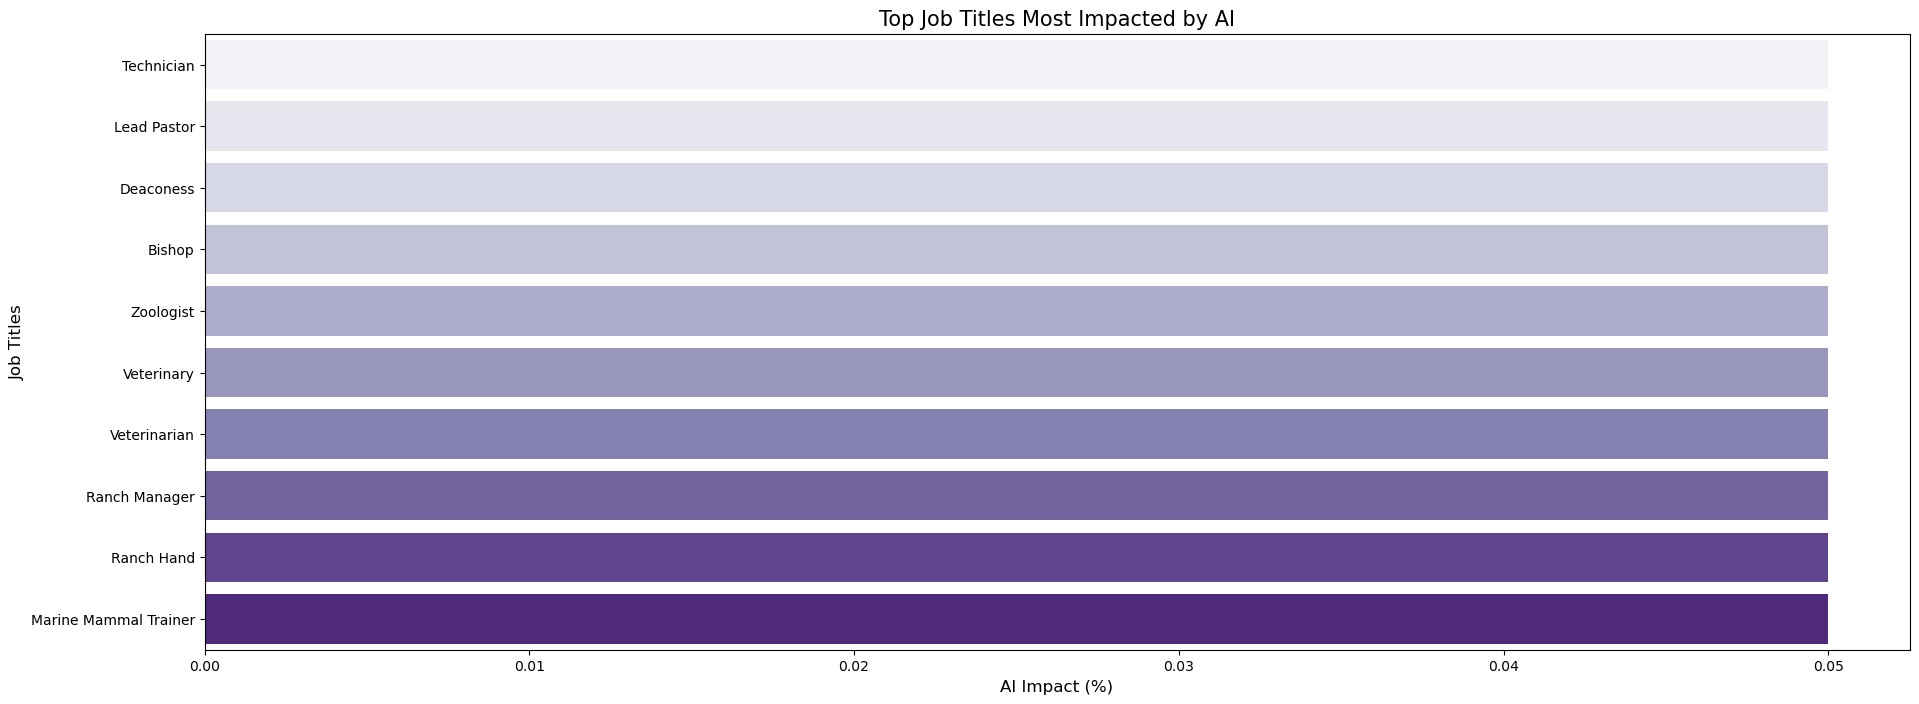

In [157]:
## least ai impacted jobs
least_10_impacted_jobs = df.sort_values(by='AI Impact', ascending=True).head(10)

plt.figure(figsize=(22, 8))
sns.barplot(x='AI Impact', y='Job titiles', data=least_10_impacted_jobs, palette="Purples")
plt.title('Top Job Titles Most Impacted by AI', fontsize=15)
plt.xlabel('AI Impact (%)', fontsize=12)
plt.ylabel('Job Titles', fontsize=12)
plt.show()

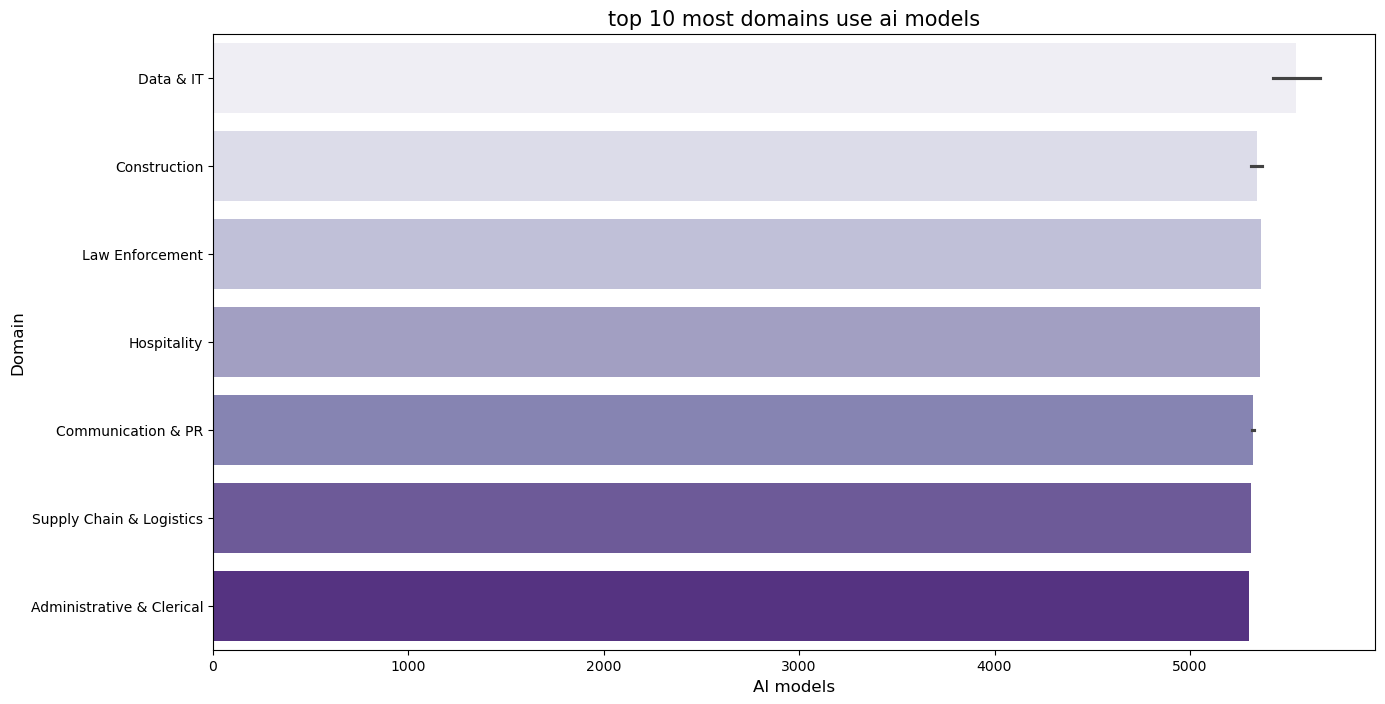

In [64]:
##top 10 most domains use ai models
top_10 = df.sort_values(by='AI models', ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(x='AI models', y='Domain', data= top_10, palette="Purples")
plt.title('top 10 most domains use ai models', fontsize=15)
plt.xlabel('AI models', fontsize=12)
plt.ylabel('Domain', fontsize=12)
plt.show()

In [65]:
domain_impact = df.groupby('Domain')['AI Impact'].mean().sort_values(ascending=False)
domain_impact

Domain
Communication & PR           0.303885
Data & IT                    0.303546
Administrative & Clerical    0.303397
Leadership & Strategy        0.303248
Law Enforcement              0.303085
Medical & Healthcare         0.302951
Construction                 0.302936
Sales & Marketing            0.302809
Supply Chain & Logistics     0.302739
Hospitality                  0.302660
Name: AI Impact, dtype: float64

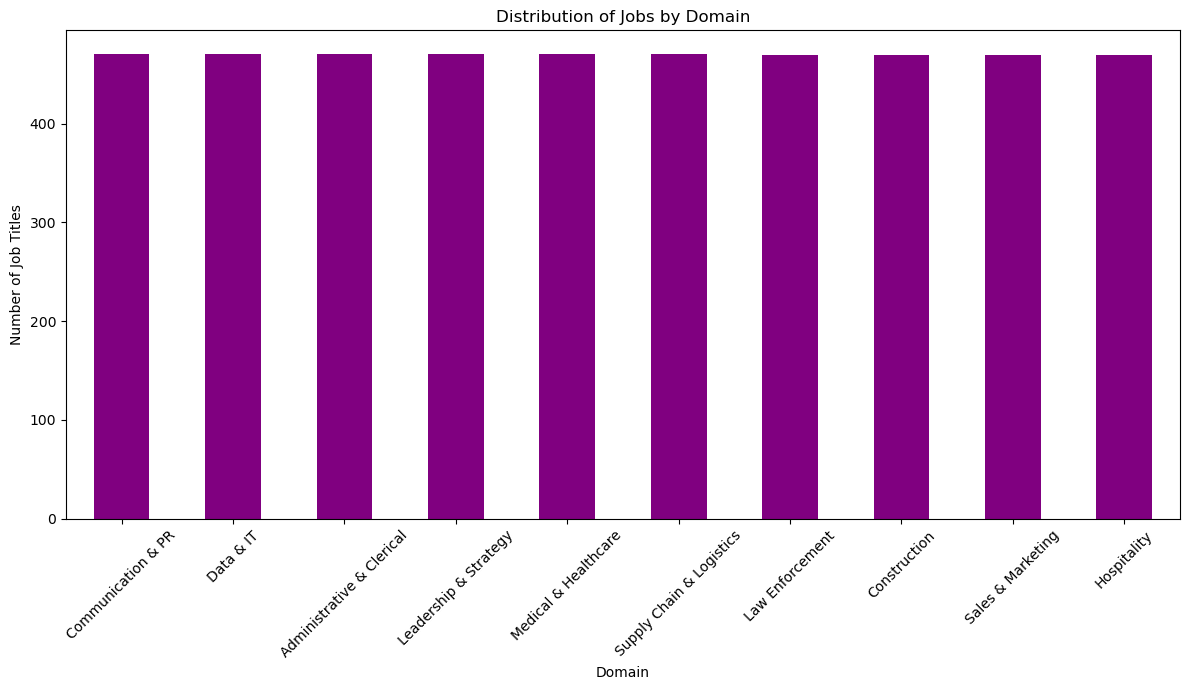

In [67]:
##distribution of jobs by domain
jobs_in_domain = df['Domain'].value_counts()
plt.figure(figsize=(12, 7))
jobs_in_domain.plot(kind='bar', color='purple')
plt.title('Distribution of Jobs by Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Job Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

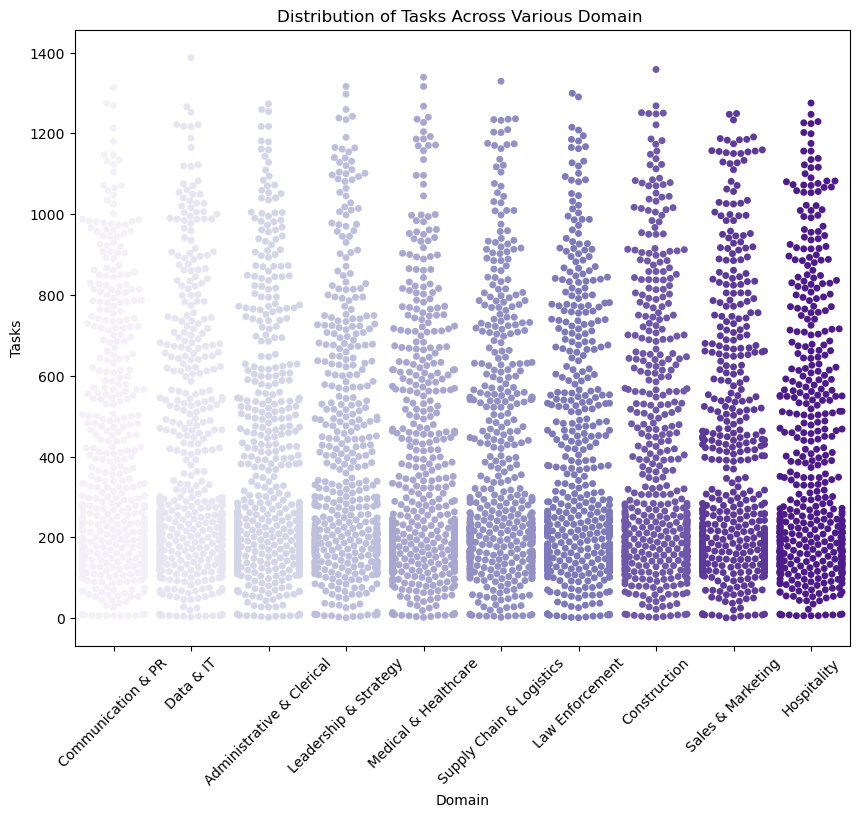

In [68]:
plt.figure(figsize=(10,8))
sns.swarmplot(x ='Domain',y='Tasks', data=df, palette="Purples")
plt.xticks(rotation=45)
plt.xlabel('Domain')
plt.ylabel('Tasks')
plt.title('Distribution of Tasks Across Various Domain ')
plt.show()

##### The distribution of tasks across various domains is quite even . which indicates that even for an outlier 'Instructional Designer' present in Data & IT with tasks and AI models being 1387 and 5666 respectively, the AI impact is only 15%.

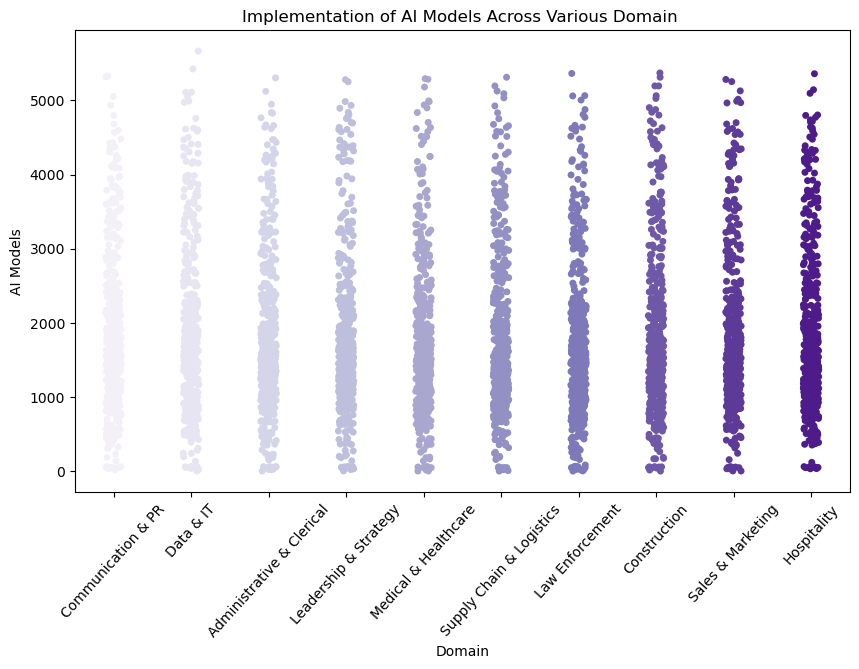

In [72]:
plt.figure(figsize=(10,6))
sns.stripplot(y='AI models',x ='Domain', data=df, palette="Purples")
plt.xticks(rotation=48)
plt.xlabel('Domain')
plt.ylabel('AI Models')
plt.title('Implementation of AI Models Across Various Domain ')
plt.show()

##### the implementation of AI models is maximum in Data & IT industry.

In [76]:
most_tasks_jobs = df.sort_values(by='Tasks', ascending=False).head(10)
most_tasks_jobs[['Job titiles', 'Tasks']]

,Job titiles,Tasks
3521,Instructional Designer,1387
3397,Senior Technical Writer,1358
3414,Program Administrator,1339
3415,Program Associate,1329
4703,Director,1316
3644,Manager,1316
3400,Writer,1314
3396,Script Writer,1299
3763,Design Manager,1297
4006,Learning And Development Specialist,1290


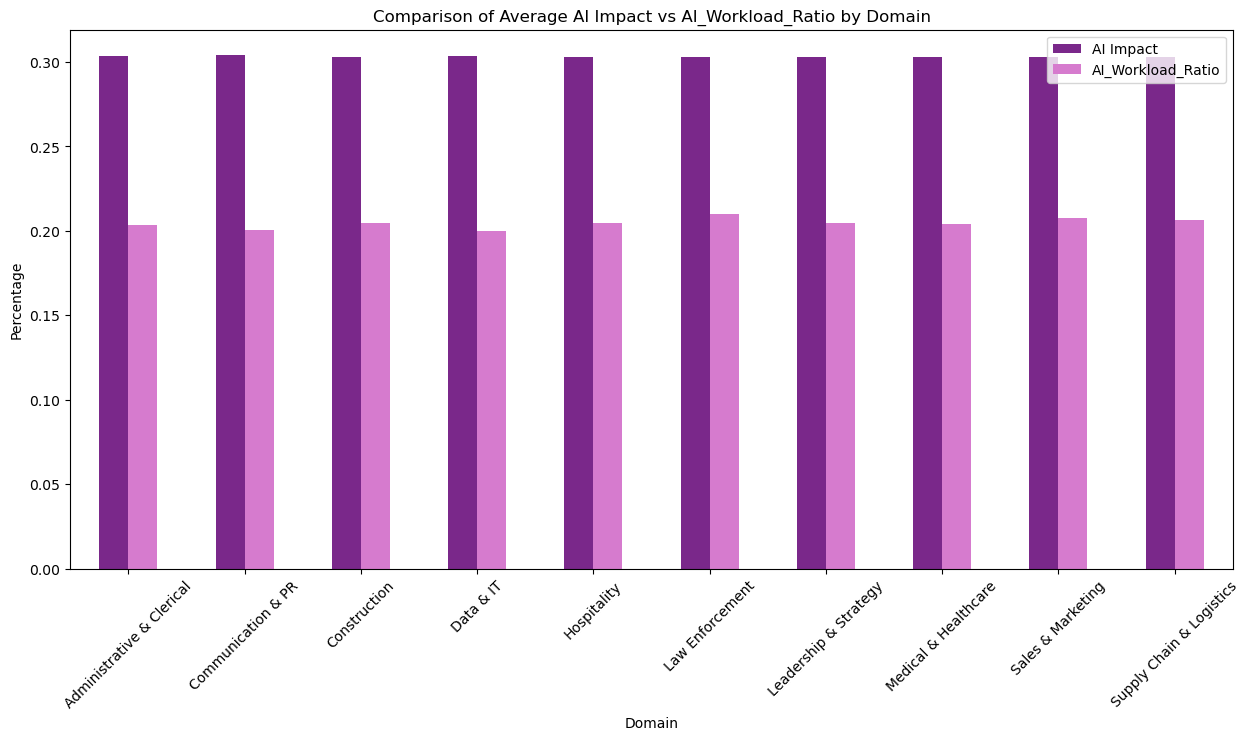

In [77]:
# Grouping by 'Domain' and calculating the mean AI Impact and AI_Workload_Ratio for each domain
domain_comparison = df.groupby('Domain')[['AI Impact', 'AI_Workload_Ratio']].mean()
ax = domain_comparison.plot(kind='bar', figsize=(15, 7), color=["#7A288A", "#D67BCE"])
plt.title('Comparison of Average AI Impact vs AI_Workload_Ratio by Domain')
plt.ylabel('Percentage')
plt.xlabel('Domain')
plt.xticks(rotation=45)
plt.show()

In [79]:
Q1 = np.percentile(df['Tasks'],25)
Q3 = np.percentile(df['Tasks'],75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR


task_outlier = df[df['Tasks'] > upper_bound]
task_outlier

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
3396,Script Writer,0.20,1299,5364,0.242170,Law Enforcement
3397,Senior Technical Writer,0.20,1358,5371,0.252839,Construction
3400,Writer,0.20,1314,5319,0.247039,Communication & PR
3414,Program Administrator,0.20,1339,5294,0.252928,Medical & Healthcare
3415,Program Associate,0.20,1329,5313,0.250141,Supply Chain & Logistics
3521,Instructional Designer,0.15,1387,5666,0.244794,Data & IT
3644,Manager,0.15,1316,5181,0.254005,Medical & Healthcare
3763,Design Manager,0.15,1297,5252,0.246954,Leadership & Strategy
4006,Learning And Development Specialist,0.10,1290,4877,0.264507,Law Enforcement
4703,Director,0.05,1316,4695,0.280298,Leadership & Strategy


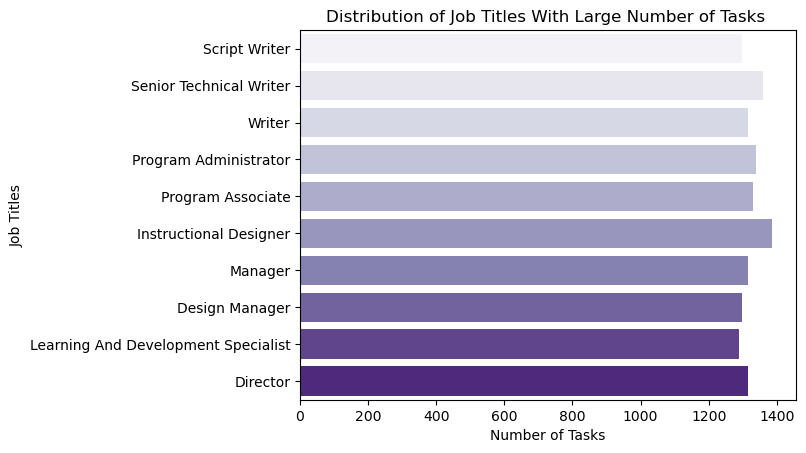

In [80]:
sns.barplot(x ='Tasks',y='Job titiles', data=task_outlier, palette="Purples")
plt.xlabel('Number of Tasks')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles With Large Number of Tasks ')
plt.show()

In [81]:
Q1 = np.percentile(df['AI models'],25)
Q3 = np.percentile(df['AI models'],75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR


AI_model_outlier = df[df['AI models'] > upper_bound]
AI_model_outlier.sort_values(by = 'AI models',ascending= False, inplace = True)
AI_model_outlier

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
3521,Instructional Designer,0.15,1387,5666,0.244794,Data & IT
3801,Junior Copywriter,0.15,1266,5425,0.233364,Data & IT
3397,Senior Technical Writer,0.20,1358,5371,0.252839,Construction
3396,Script Writer,0.20,1299,5364,0.242170,Law Enforcement
3759,Business Specialist,0.15,1247,5360,0.232649,Hospitality
...,...,...,...,...,...,...
3794,Real Estate Developer,0.15,956,4077,0.234486,Medical & Healthcare
4127,Newspaper Reporter,0.10,950,4074,0.233186,Construction
1544,Technical Consultant,0.35,1240,4070,0.304668,Medical & Healthcare
1545,Technology Consultant,0.35,1236,4064,0.304134,Supply Chain & Logistics


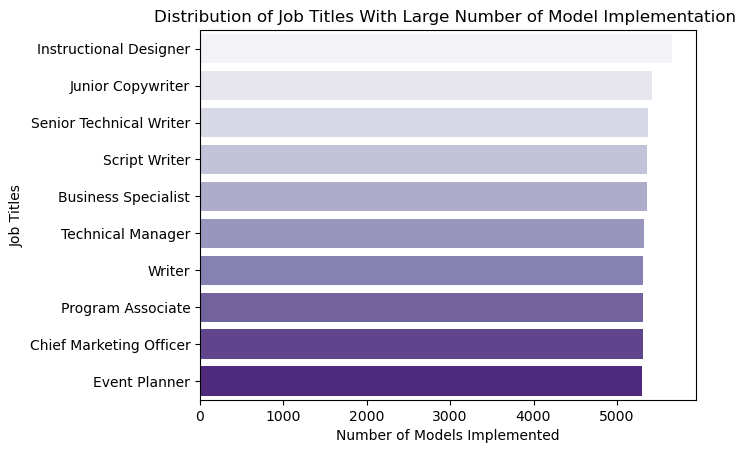

In [84]:
sns.barplot(x ='AI models',y='Job titiles', data=AI_model_outlier.head(10), palette="Purples")
plt.xlabel('Number of Models Implemented')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles With Large Number of Model Implementation ')
plt.show()

In [85]:
Q1,Q3 = df['AI_Workload_Ratio'].quantile([0.25,0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
workload_ratio_outlier = df[(df['AI_Workload_Ratio'] > upper_bound) | (df['AI_Workload_Ratio'] < lower_bound)]
workload_ratio_outlier.sort_values(by = 'AI_Workload_Ratio',ascending= False, inplace = True)
workload_ratio_outlier

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
3058,After School Teacher,0.2,1,1,1.000000,Sales & Marketing
3185,Dog Trainer,0.2,5,6,0.833333,Supply Chain & Logistics
186,Flooring Installer,0.7,1,2,0.500000,Law Enforcement
413,Safety Coordinator,0.6,1,2,0.500000,Leadership & Strategy
3358,Front Office Manager,0.2,1,2,0.500000,Sales & Marketing


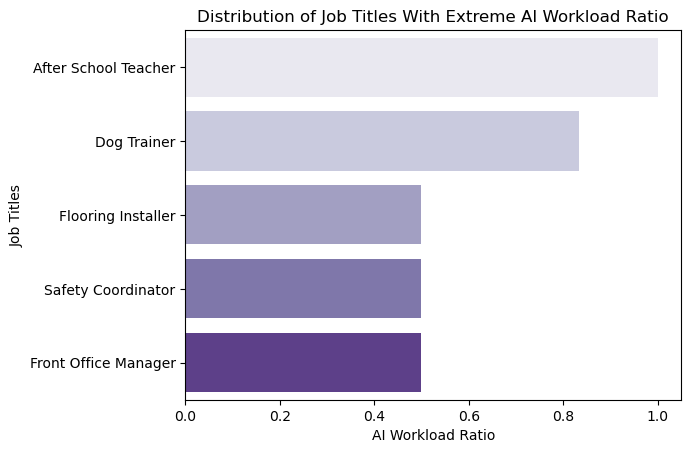

In [87]:
sns.barplot(x ='AI_Workload_Ratio',y='Job titiles', data=workload_ratio_outlier, palette="Purples")

plt.xlabel('AI Workload Ratio')
plt.ylabel('Job Titles')
plt.title('Distribution of Job Titles With Extreme AI Workload Ratio')

plt.show()

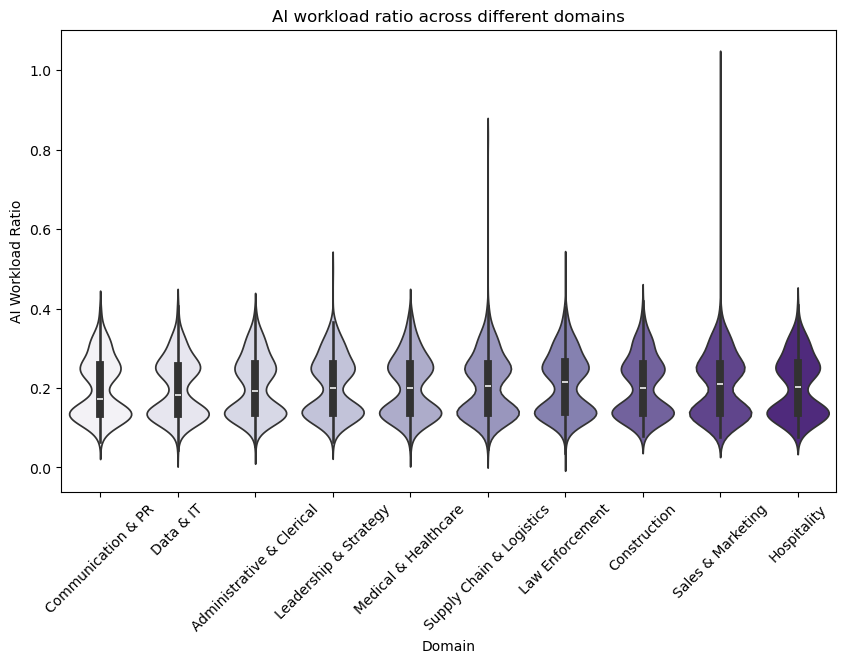

In [88]:
plt.figure(figsize=(10,6))
sns.violinplot(y='AI_Workload_Ratio',x ='Domain', data=df, palette="Purples")
plt.xticks(rotation=45)
plt.xlabel('Domain')
plt.ylabel('AI Workload Ratio')
plt.title('AI workload ratio across different domains')
plt.show()

##### as shown above theSupply Chain & Logistics and Sales & Marketing are two industries consisting of job roles with very high AI workload ratio.

In [90]:
df.columns

Index(['Job titiles', 'AI Impact', 'Tasks', 'AI models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')